In [5]:
# reload packages
%load_ext autoreload
%autoreload 2

### Choose GPU (this may not be needed on your computer)

In [6]:
%env CUDA_DEVICE_ORDER=PCI_BUS_ID
%env CUDA_VISIBLE_DEVICES=''

env: CUDA_DEVICE_ORDER=PCI_BUS_ID
env: CUDA_VISIBLE_DEVICES=''


### load packages

In [7]:
from tfumap.umap import tfUMAP

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [8]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tqdm.autonotebook import tqdm
import umap
import pandas as pd

### Load dataset

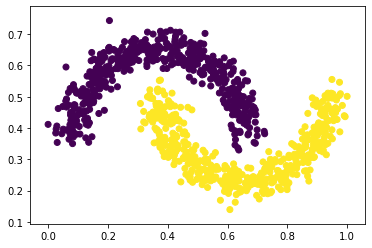

In [9]:
from sklearn.datasets import make_moons

X_train, Y_train = make_moons(1000, random_state=0, noise=0.1)

X_test, Y_test = make_moons(1000, random_state=1, noise=0.1)

X_valid, Y_valid = make_moons(1000, random_state=2, noise=0.1)

def norm(x):
    return (x - np.min(x)) / (np.max(x) - np.min(x))

X_train = norm(X_train)
X_valid = norm(X_valid)
X_test = norm(X_test)
X_train_flat = X_train

X_test_flat = X_test


plt.scatter(X_test[:,0], X_test[:,1], c=Y_test)

### define networks

In [10]:
dims = (2)
n_components = 2

In [11]:
encoder = tf.keras.Sequential()
encoder.add(tf.keras.layers.InputLayer(input_shape=dims))
encoder.add(tf.keras.layers.Flatten())
encoder.add(tf.keras.layers.Dense(units=100, activation="relu"))
encoder.add(tf.keras.layers.Dense(units=100, activation="relu"))
encoder.add(tf.keras.layers.Dense(units=100, activation="relu"))
encoder.add(
    tf.keras.layers.Dense(units=n_components, name="z")
)

In [16]:
decoder = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(n_components)),
    tf.keras.layers.Dense(units=100, activation="relu"),
    tf.keras.layers.Dense(units=100, activation="relu"),
    tf.keras.layers.Dense(units=100, activation="relu"),
    tf.keras.layers.Dense(units=2, activation="sigmoid"),
])

In [17]:
input_img = tf.keras.Input(dims)
output_img = decoder(encoder(input_img))
autoencoder = tf.keras.Model(input_img, output_img)

In [18]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [19]:
#X_train = X_train.reshape([len(X_train)] + list(dims))
history = autoencoder.fit(X_train, X_train,
                epochs=500,
                batch_size=256,
                shuffle=True,
                #validation_data=(X_valid, X_valid)
                         )

Epoch 1/500
4/4 [==============================] - 0s 2ms/step - loss: 0.6910
Epoch 2/500
4/4 [==============================] - 0s 3ms/step - loss: 0.6839
Epoch 3/500
4/4 [==============================] - 0s 3ms/step - loss: 0.6729
Epoch 4/500
4/4 [==============================] - 0s 3ms/step - loss: 0.6569
Epoch 5/500
4/4 [==============================] - 0s 3ms/step - loss: 0.6386
Epoch 6/500
4/4 [==============================] - 0s 3ms/step - loss: 0.6240
Epoch 7/500
4/4 [==============================] - 0s 3ms/step - loss: 0.6186
Epoch 8/500
4/4 [==============================] - 0s 3ms/step - loss: 0.6157
Epoch 9/500
4/4 [==============================] - 0s 3ms/step - loss: 0.6107
Epoch 10/500
4/4 [==============================] - 0s 3ms/step - loss: 0.6102
Epoch 11/500
4/4 [==============================] - 0s 3ms/step - loss: 0.6079
Epoch 12/500
4/4 [==============================] - 0s 3ms/step - loss: 0.6067
Epoch 13/500
4/4 [==============================] - 0s 3ms/st

4/4 [==============================] - 0s 3ms/step - loss: 0.5866
Epoch 207/500
4/4 [==============================] - 0s 3ms/step - loss: 0.5866
Epoch 208/500
4/4 [==============================] - 0s 3ms/step - loss: 0.5866
Epoch 209/500
4/4 [==============================] - 0s 3ms/step - loss: 0.5866
Epoch 210/500
4/4 [==============================] - 0s 3ms/step - loss: 0.5866
Epoch 211/500
4/4 [==============================] - 0s 3ms/step - loss: 0.5866
Epoch 212/500
4/4 [==============================] - 0s 3ms/step - loss: 0.5866
Epoch 213/500
4/4 [==============================] - 0s 3ms/step - loss: 0.5866
Epoch 214/500
4/4 [==============================] - 0s 3ms/step - loss: 0.5866
Epoch 215/500
4/4 [==============================] - 0s 3ms/step - loss: 0.5866
Epoch 216/500
4/4 [==============================] - 0s 3ms/step - loss: 0.5866
Epoch 217/500
4/4 [==============================] - 0s 3ms/step - loss: 0.5866
Epoch 218/500
4/4 [==============================] - 0

4/4 [==============================] - 0s 3ms/step - loss: 0.5865
Epoch 411/500
4/4 [==============================] - 0s 3ms/step - loss: 0.5865
Epoch 412/500
4/4 [==============================] - 0s 3ms/step - loss: 0.5865
Epoch 413/500
4/4 [==============================] - 0s 3ms/step - loss: 0.5865
Epoch 414/500
4/4 [==============================] - 0s 3ms/step - loss: 0.5865
Epoch 415/500
4/4 [==============================] - 0s 3ms/step - loss: 0.5865
Epoch 416/500
4/4 [==============================] - 0s 3ms/step - loss: 0.5865
Epoch 417/500
4/4 [==============================] - 0s 3ms/step - loss: 0.5865
Epoch 418/500
4/4 [==============================] - 0s 3ms/step - loss: 0.5865
Epoch 419/500
4/4 [==============================] - 0s 3ms/step - loss: 0.5865
Epoch 420/500
4/4 [==============================] - 0s 3ms/step - loss: 0.5865
Epoch 421/500
4/4 [==============================] - 0s 3ms/step - loss: 0.5865
Epoch 422/500
4/4 [==============================] - 0

In [20]:
z = encoder.predict(X_train)

In [21]:
z_recon = decoder.predict(z)

### Plot model output

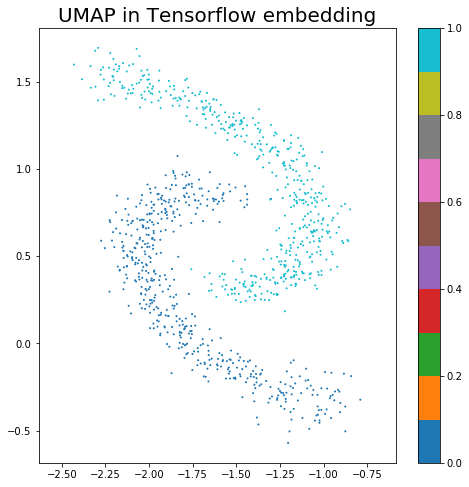

In [24]:
fig, ax = plt.subplots( figsize=(8, 8))
sc = ax.scatter(
    z[:, 0],
    z[:, 1],
    c=Y_train.astype(int)[:len(z)].flatten(),
    cmap="tab10",
    s=1,
    alpha=1,
    rasterized=True,
)
ax.axis('equal')
ax.set_title("UMAP in Tensorflow embedding", fontsize=20)
plt.colorbar(sc, ax=ax);

(-0.042181508981910955,
 1.0211242012617268,
 0.10535578723994131,
 0.7477079749480162)

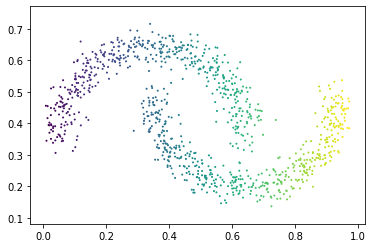

In [26]:
fig, ax = plt.subplots()
ax.scatter(z_recon[:,0], z_recon[:,1], s = 1, c = z_recon[:,0], alpha = 1)
ax.axis('equal')

### Save output

In [27]:
from tfumap.paths import ensure_dir, MODEL_DIR

In [28]:
dataset = 'moons'

In [29]:
output_dir = MODEL_DIR/'projections'/ dataset / 'ae_only'
ensure_dir(output_dir)

In [30]:
encoder.save(output_dir / 'encoder')

W0822 11:39:36.108208 140245949060928 deprecation.py:323] From /mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/tensorflow/python/training/tracking/tracking.py:111: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
W0822 11:39:36.278912 140245949060928 deprecation.py:323] From /mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/tensorflow/python/training/tracking/tracking.py:111: Layer.updates (from tensorflow.python.keras.engine.base_layer) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
I0822 11:39:36.529904 140245949060928 builder_impl.py:775] Assets written to: /mnt/cube/tsainbur/Projects/github_repos/umap_tf_networks/models/projections/moons/ae_only

In [31]:
decoder.save(output_dir / 'encoder')

I0822 11:39:37.347637 140245949060928 builder_impl.py:775] Assets written to: /mnt/cube/tsainbur/Projects/github_repos/umap_tf_networks/models/projections/moons/ae_only/encoder/assets


In [32]:
#loss_df.to_pickle(output_dir / 'loss_df.pickle')

In [33]:
np.save(output_dir / 'z.npy', z)